In [1]:
import torch
import torch.nn as nn

from torch import optim
from torch.autograd import Variable
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from utils.CvTransform import CvResize, CvCenterCrop

import torch.utils.data

from utils.tokenMaker import Lang
from utils.tool import padding, flatMutileLength, fixString
from modal.BigModal import ImgToSeq
from dataset.readVideo import DramaDataset
useCuda = True
Variable = Variable.cuda if useCuda else Variable

In [2]:
DataDir="/home/ball/Videos/BrokeEN"
datasets = DramaDataset(basedir=DataDir,
                        maxFrame=1,
                        )
transform = transforms.Compose([CvResize(256),
                                            CvCenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                        ])
len(datasets)

Total Drama: 70


25583

In [3]:
import random
def getSample(size):
    imgs = []
    pres = []
    nexs = []
    for i in range(size):
        pre, nex, img = random.choice(datasets)
        imgs.append(img)
        pres.append(pre)
        nexs.append(nex)
    return pres, nexs, imgs

In [4]:
import matplotlib.pyplot as plt
UF = nn.functional.upsample
crop = transforms.Compose([CvResize(256),CvCenterCrop(224)])
def getConvLast(cmodal, img):
    c1 = cmodal.conv1(img)
    c1 = cmodal.relu(cmodal.bn1(c1))
    c1 = cmodal.maxpool(c1)
    c2 = cmodal.layer1(c1)
    c3 = cmodal.layer2(c2)
    c4 = cmodal.layer3(c3)
    c5 = cmodal.layer4(c4)
    return c5

def showHeatMap(imgs, lcs):
    heatmap = torch.sum(lcs, 1)
    heatmap = UF(heatmap.unsqueeze(1), (224,224), mode="bilinear")[:,0,:]
    
    col=5
    plt.figure(figsize=(20,10))
    for i in range(len(imgs)):
        plt.subplot(len(imgs)/col+1,col,i+1)
        plt.axis('off')
        plt.imshow(crop(imgs[i]))
        plt.imshow(heatmap[i].data, cmap='hot', alpha=0.55)
    plt.show()
def showImgs(imgs):
    col=5
    plt.figure(figsize=(20,10))
    for i in range(len(imgs)):
        plt.subplot(len(imgs)/col+1,col,i+1)
        plt.axis('off')
        plt.imshow(imgs[i])
    plt.show()

In [5]:
import pickle
import os
ModalDir = "ImgSub2Sub/modals/bken"
with open(os.path.join(ModalDir, "Lang.pkl"), 'rb') as f:
    lang = pickle.load(f)
    print("Load lang model: {}. Word size: {}".format(ModalDir, len(lang)))
modal = torch.load(os.path.join(ModalDir, "SubImgModal.10.pkl")).eval()

Load lang model: ImgSub2Sub/modals/bken. Word size: 10027


In [6]:
import torchvision.models as models
npcnn = models.resnet50(pretrained=False).cuda().eval()
pcnn = models.resnet50(pretrained=True).cuda().eval()

In [7]:
cnn = modal.videoRnn.cnn.eval()

In [8]:
pres, nexs, imgs = getSample(10)

In [13]:
pres

['Banging on glass Max Johnny',
 'About that',
 'All right go',
 'Bring it all Ugh',
 'Max can you take that flu season pamphlet and fan my feet',
 '25 for chap stick',
 'Great the puppet has insurance and we don t',
 'Let me check with my associate',
 'Are any of us really',
 'Come to my home for dinner']

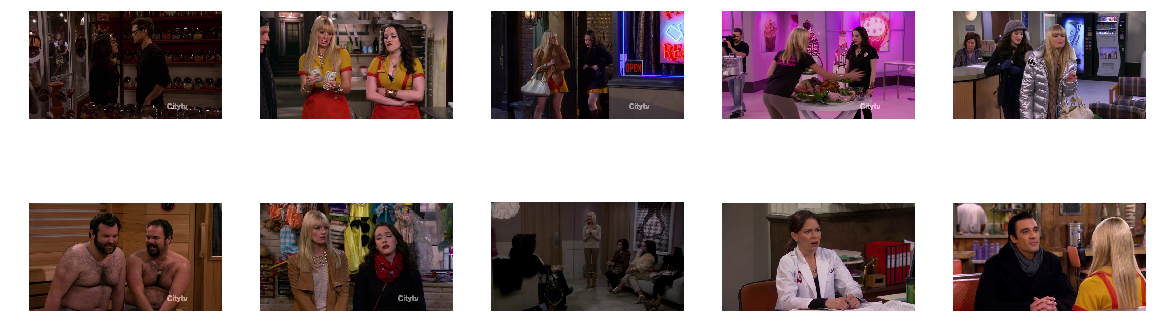

In [9]:
oimgs = [i[0] for i in imgs]
tImgs = Variable(torch.stack([transform(i) for i in oimgs]))
cImgs = [crop(i) for i in oimgs]
showImgs(oimgs)

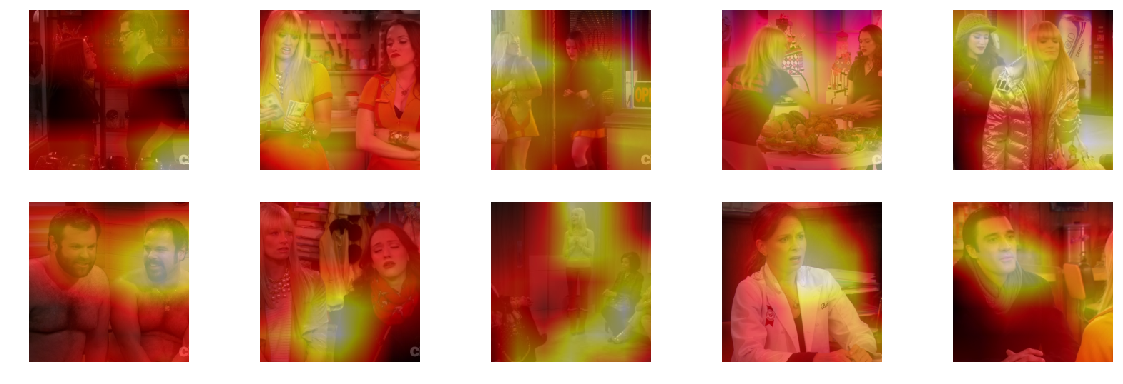

In [10]:
c5 = getConvLast(cnn, tImgs)
showHeatMap(oimgs, c5[:,:,:,:])

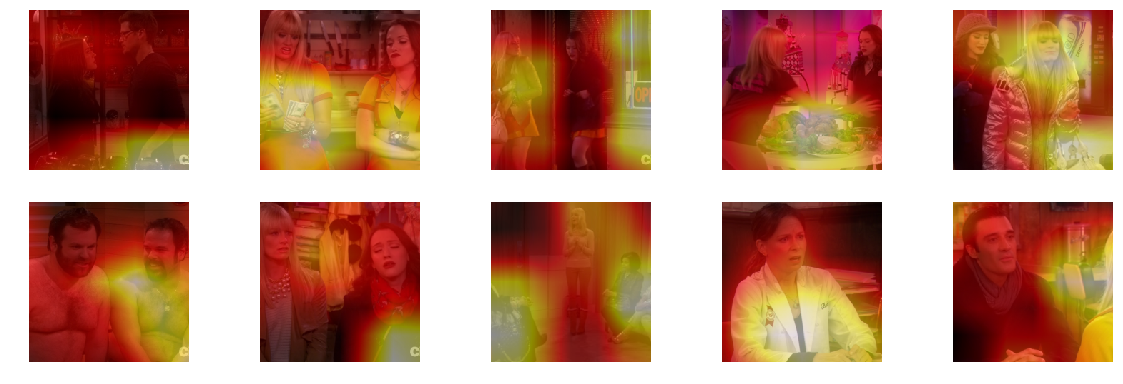

In [11]:
c5 = getConvLast(pcnn, tImgs)
showHeatMap(oimgs, c5[:,:,:,:])

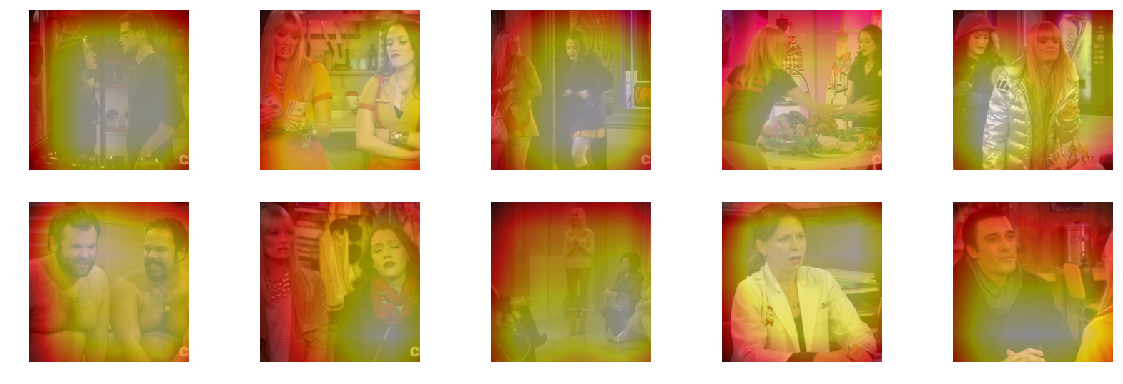

In [12]:
c5 = getConvLast(npcnn, tImgs)
showHeatMap(oimgs, c5[:,:,:,:])

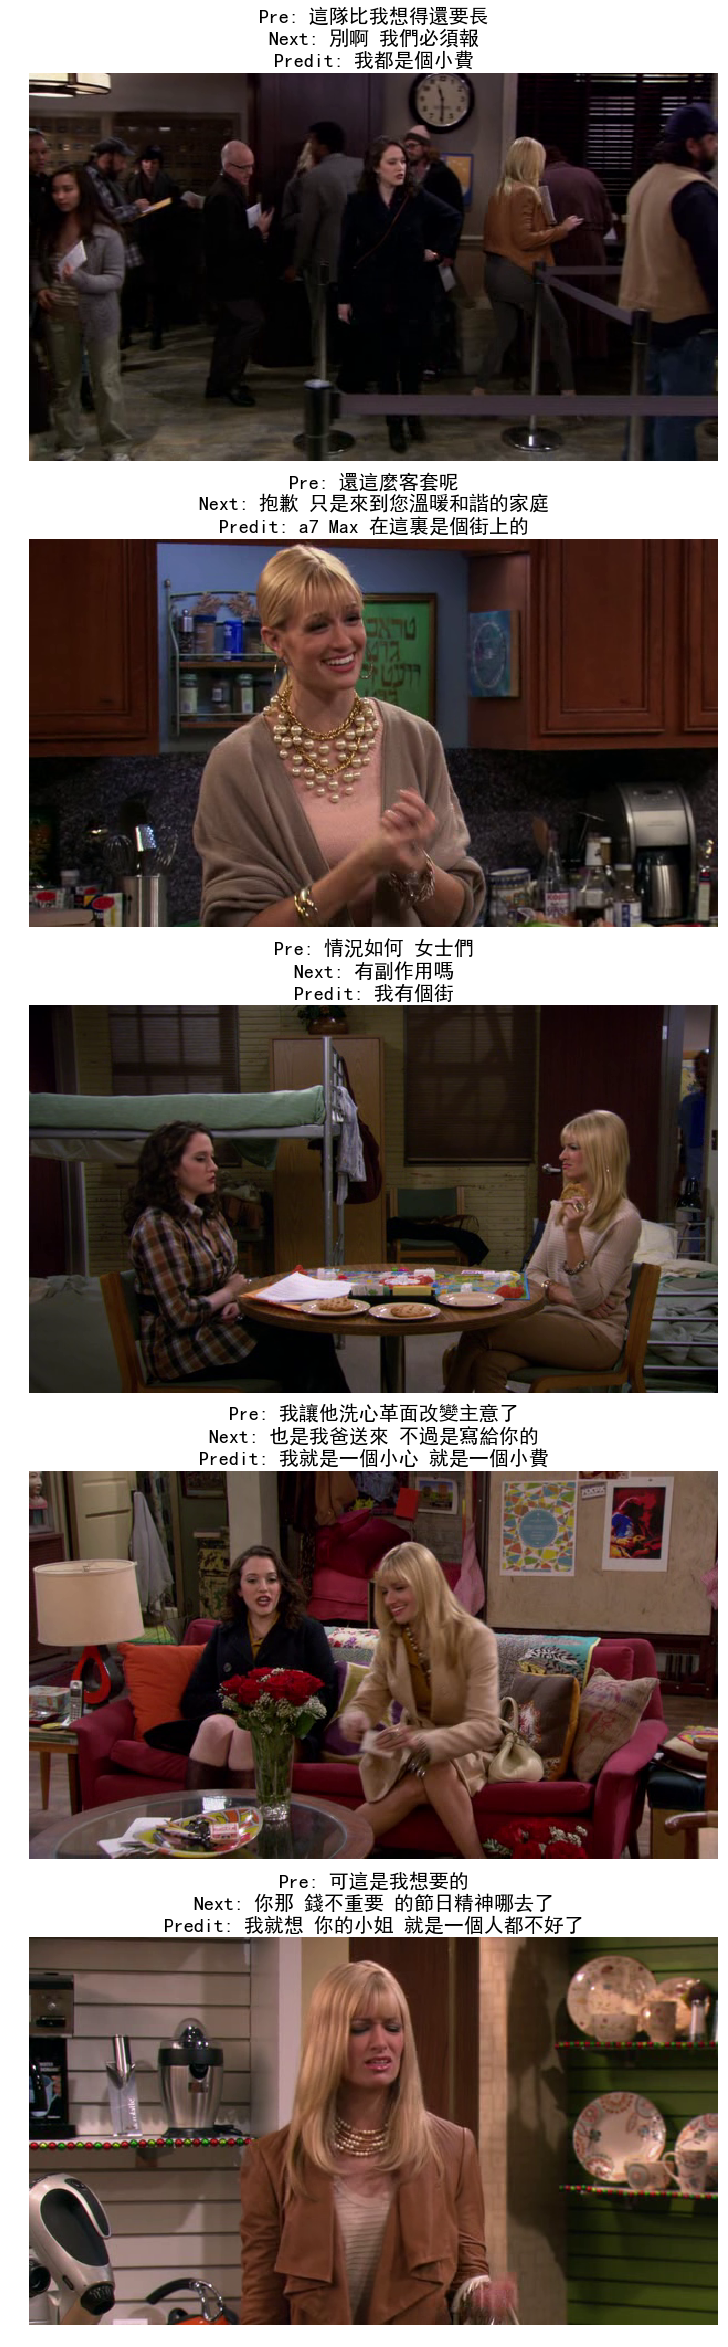

In [42]:
makes = mutilePredit(pres, nexs, imgs)
showImgs([ims[0] for ims in imgs], pres, nexs, makes)

In [109]:
lang.word2count

{'萎': 4,
 '唬': 10,
 '们': 33522,
 '锻': 34,
 '嫉': 43,
 '迁': 16,
 '涅': 2,
 '那': 7916,
 '癞': 2,
 '田': 16,
 '纠': 46,
 '写': 420,
 '在': 13018,
 '芭': 88,
 '旗': 114,
 '久': 339,
 '掉': 719,
 '龌': 1,
 '雷': 120,
 '疱': 21,
 '觅': 5,
 '岂': 2,
 '伽': 1,
 '疼': 58,
 '阔': 8,
 '坯': 1,
 '余': 34,
 '窒': 12,
 '乱': 209,
 '绘': 3,
 '谧': 3,
 '惜': 35,
 '处': 557,
 '英': 230,
 '宽': 42,
 '祸': 43,
 '赢': 391,
 '睹': 17,
 '犯': 286,
 '之': 1313,
 '阡': 4,
 '桥': 12,
 '窨': 2,
 '爽': 195,
 '堪': 21,
 '铛': 8,
 '终': 325,
 '训': 174,
 '铝': 1,
 '晚': 922,
 '阵': 46,
 '烟': 313,
 'J': 1010,
 '答': 235,
 '至': 384,
 '干': 1699,
 '乡': 100,
 '松': 218,
 '晨': 33,
 '童': 351,
 '瞄': 1,
 '秩': 12,
 '溅': 8,
 'f': 563,
 '冬': 14,
 '谐': 16,
 '企': 47,
 '成': 1814,
 '梁': 2,
 '诉': 1399,
 '匠': 17,
 '脖': 33,
 '慷': 4,
 '段': 199,
 '焚': 7,
 '庇': 4,
 '未': 288,
 '蒂': 82,
 'D': 666,
 '攸': 4,
 '款': 68,
 '妥': 24,
 '缚': 4,
 '登': 44,
 '壤': 2,
 '喉': 8,
 'u': 2127,
 '架': 231,
 '捐': 32,
 '蹩': 6,
 '宠': 54,
 '阅': 40,
 '括': 33,
 '暖': 91,
 '哄': 10,
 '枕': 21,
 '吉': 290,
 '杈': 3,
 